In [1]:
from consav import runtools
runtools.write_numba_config(disable=0,threads=8)
%matplotlib inline
# reload module each time cell is run
%load_ext autoreload
%autoreload 2

In [194]:
from Model import RetirementModelClass

In [195]:
# a. setup (calling the __init__ method) 
model = RetirementModelClass(name='baseline',solmethod='egm')

# b. print
#print(model)

# c. solve
model.solve()

Iteration 8
Iteration 7
Iteration 6
Iteration 5
Iteration 4
Iteration 3
Iteration 2
Iteration 1
Iteration 0


In [196]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set_style("whitegrid")
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]
import ipywidgets as widgets

In [147]:
def cons_time(model,t):
    
    # convert to list
    if type(t) == int:
        t = [t]
    
    # a. unpack
    par = model.par
    sol = model.sol
    poc = par.poc
    
    # b. loop
    for i in t:
        
        m = sol.m[i]
        c = sol.c[i]

        # c. figure
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)

        # d. plot consumption
        ax.plot(m[:,0],c[:,0])
        ax.plot(m[:,1],c[:,1])
        ax.set_title(f'$c$ ($t = {i})$',pad=10)

        # f. details
        ax.grid(True)
        ax.set_xlabel('$m_t$')
        ax.set_xlim(min(m[poc,0],m[0,1]),max(m[-1,0], m[-1,1]))
        ax.set_ylabel('$C_t$')
        ax.set_ylim(min(c[poc,0],c[0,1]),max(c[-1,0], c[-1,1]))

        plt.show()

In [148]:
def cons_choice(model,t,choice='work'):
    
    # a. unpack
    par = model.par
    sol = model.sol
    poc = par.poc
    
    # extract right variables
    if choice=='work':
        title = 'work'
        m = sol.m[:,:,1]
        c = sol.c[:,:,1]
    else:
        title = 'retire'
        m = sol.m[:,:,0]
        c = sol.c[:,:,0]        
    
    # convert to list
    if type(t) == int:
        t = [t]

    # c. figure
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

    # d. plot consumption
    for i in t:
        ax.plot(m[i],c[i])
    
    #ax.set_title(f'$c$ ($t = {i})$',pad=10)
    ax.set_title(title)

    # f. details
    ax.grid(True)
    ax.set_xlabel('$m_t$')
    ax.set_xlim(0,15)
    ax.set_ylabel('$C_t$')
    ax.set_ylim(0,10)

    plt.show()

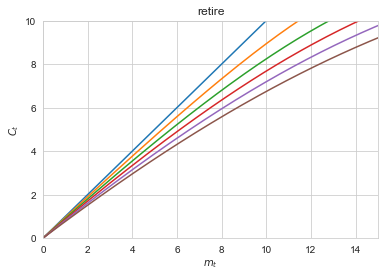

In [197]:
cons_choice(model,[19,18,17,16,15,14],choice='retire')

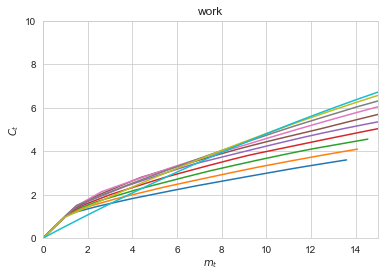

In [201]:
cons_choice(model,[0,1,2,3,4,5,6,7,8,9],choice='work')

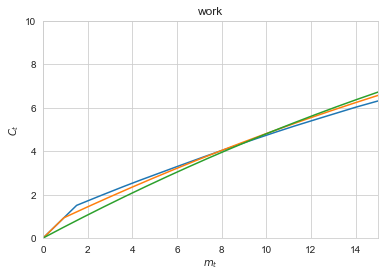

In [199]:
cons_choice(model,[7,8,9],choice='work')

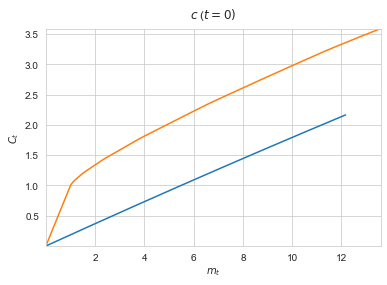

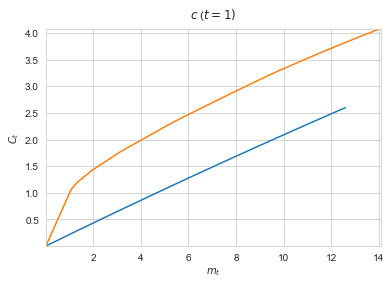

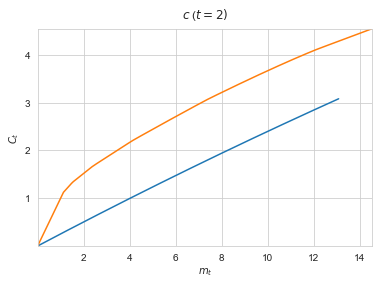

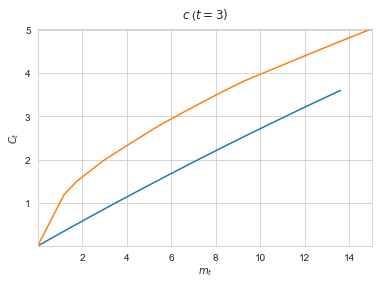

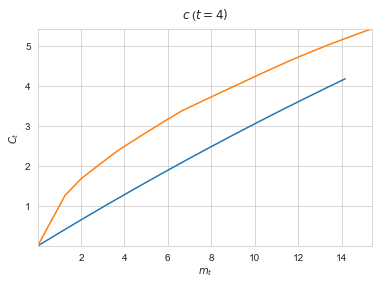

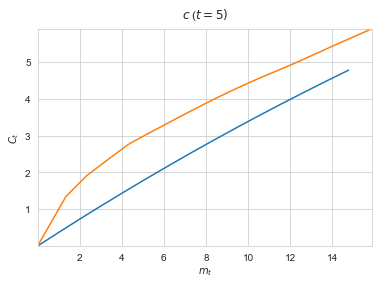

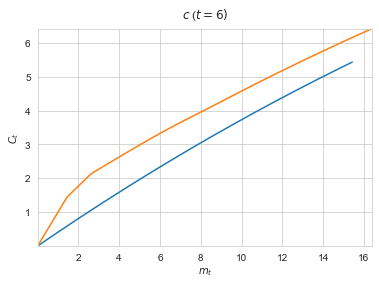

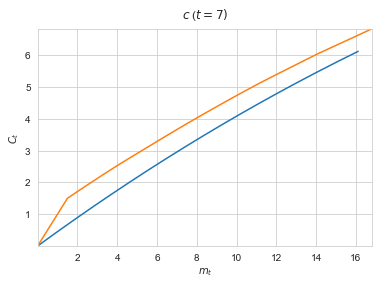

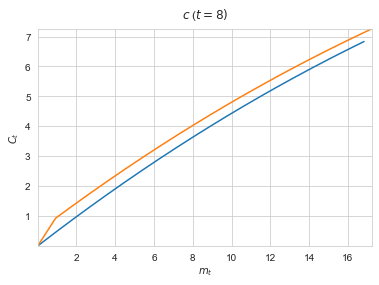

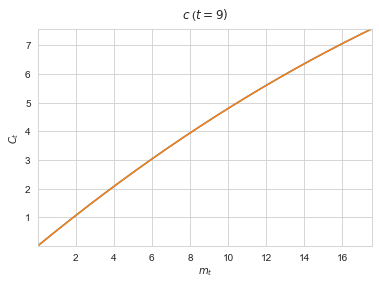

In [200]:
cons_time(model,[0,1,2,3,4,5,6,7,8,9])

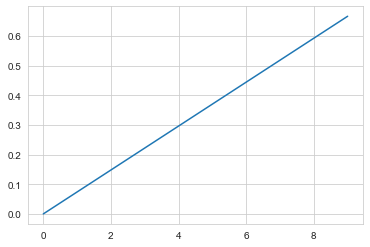

In [188]:
plt.plot(model.sol.c[6,0:10,1])

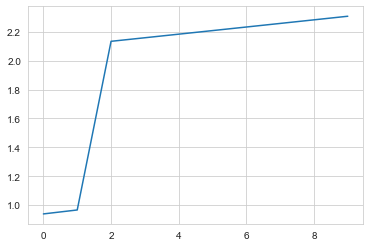

In [189]:
plt.plot(model.sol.c[6,20:30,1])

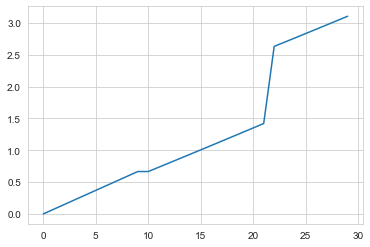

In [191]:
plt.plot(model.sol.m[6,0:30,1])

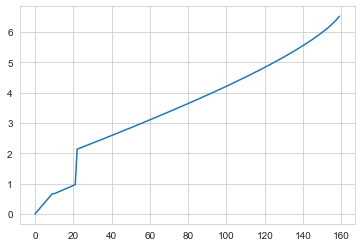

In [178]:
plt.plot(model.sol.c[6,:,1])